In [1]:
import os,glob
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from glob import glob
from dlab import sglx_analysis as sglx
from dlab import sorting_quality as sq
from dlab import summary_plots as summary

In [2]:
#path = 'C:\\Users\\juans\\Documents\\Denmanlab\\RAW DATA\\'
path = 'Z:\\color_representation\\C51\\20210607_c51_ABC_g1\\'
units_file = glob(path+'*ntermediates\*spiketimes.json')[0]
gratings_file = glob(path+'*ntermediates\*gratings.json')[0]
matrix_file = glob(path+'*ntermediates\*matrices.pkl')[0]

units_df = pd.read_json(open(units_file,'rb'))
matrix_data = pkl.load(open(matrix_file,'rb'))
gratings_data = pd.read_json(open(gratings_file,'rb'))

In [96]:
probe_folder = glob(path+'\*imec0*')[0] #Change the probe number as necessary
bin_file = glob(probe_folder+'\*ap.bin')[0] #Change the probe number as necessary
imec_meta = sglx.readMeta(probe_folder+'\\')
sampRate = float(imec_meta['imSampRate']) #get sampling rate (Hz)

mean_wf = sq.mean_waveform(rawdata=bin_file,times=units_df.times[15],channels=385,sampling_rate = float(sampRate))

In [97]:
mean_wf

[array([ 0.        ,  0.00057344, -0.00267283, -0.0006998 , -0.0006026 ,
        -0.01290734, -0.01391816, -0.00613293, -0.01146887, -0.00963191,
        -0.01066216, -0.01682425, -0.00304217, -0.00261451, -0.00410158,
        -0.01166326, -0.014443  , -0.01190625, -0.00346982,  0.00038878,
         0.00019439,  0.00085531, -0.00736729, -0.00690076, -0.00549145,
        -0.02221851, -0.01272267, -0.01061357, -0.02735035, -0.01982754,
        -0.02147984, -0.01801002, -0.00547201, -0.01119673, -0.01314061,
        -0.01202288, -0.00686189, -0.00096222, -0.00281862, -0.00885436,
        -0.00140931,  0.00425709,  0.00035962,  0.01210063,  0.00370309,
        -0.00176893, -0.00640507, -0.01277127, -0.01264492, -0.01352938,
        -0.01732966, -0.00864053, -0.00488885, -0.00994293, -0.00966107,
        -0.0090779 , -0.00985546, -0.00802821, -0.01129392, -0.01241165]),
 array([ 0.        ,  0.01144943, -0.00132184,  0.00412102,  0.01626053,
         0.00340178,  0.0003013 ,  0.00516099,  0

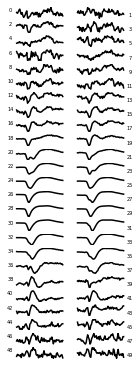

In [64]:
fig = plt.figure(figsize=(2,50),facecolor='white')
for i,j in enumerate(mean_wf[50:100]):
    plt.subplot(int(len(mean_wf)/2),2,i+1)
    plt.plot(j,c='k')
    ax= plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel(i,fontsize=5,rotation=0)
    if i%2!=0:
        ax.yaxis.set_label_position('right')
    ax.set_facecolor('white')

In [31]:
gratings_orientation = gratings_data[gratings_data['condition']=='orientation']

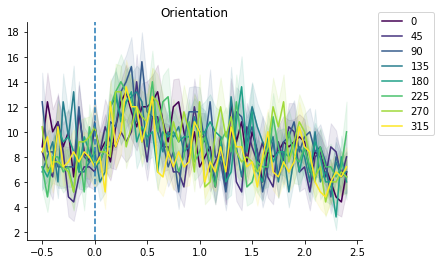

In [32]:
grating = summary.psth_line_overlay(spike_data=units_df, probe='imec0', unit=43, stim_data=gratings_orientation, 
                                     condition='ori',title='Orientation', pre=0.5, post=2.5,binsize=0.05,variance=True)

In [39]:
import matplotlib.gridspec as gridspec

In [40]:
def placeAxesOnGrid(fig,dim=[1,1],xspan=[0,1],yspan=[0,1],wspace=None,hspace=None):
    '''
    Takes a figure with a gridspec defined and places an array of sub-axes on a portion of the gridspec
    
    Takes as arguments:
        fig: figure handle - required
        dim: number of rows and columns in the subaxes - defaults to 1x1
        xspan: fraction of figure that the subaxes subtends in the x-direction (0 = left edge, 1 = right edge)
        yspan: fraction of figure that the subaxes subtends in the y-direction (0 = top edge, 1 = bottom edge)
        wspace and hspace: white space between subaxes in vertical and horizontal directions, respectively
        
    returns:
        subaxes handles
        
        written by doug ollerenshaw
    '''

    outer_grid = gridspec.GridSpec(100,100)
    inner_grid = gridspec.GridSpecFromSubplotSpec(dim[0],dim[1],
                                                  subplot_spec=outer_grid[int(100*yspan[0]):int(100*yspan[1]),int(100*xspan[0]):int(100*xspan[1])],
                                                  wspace=wspace, hspace=hspace)
    

    #NOTE: A cleaner way to do this is with list comprehension:
    # inner_ax = [[0 for ii in range(dim[1])] for ii in range(dim[0])]
    inner_ax = dim[0]*[dim[1]*[fig]] #filling the list with figure objects prevents an error when it they are later replaced by axis handles
    inner_ax = np.array(inner_ax)
    idx = 0
    for row in range(dim[0]):
        for col in range(dim[1]):
            inner_ax[row][col] = plt.Subplot(fig, inner_grid[idx])
            fig.add_subplot(inner_ax[row,col])
            idx += 1

    inner_ax = np.array(inner_ax).squeeze().tolist() #remove redundant dimension
    return inner_ax

ValueError: The Axes must have been created in the present figure

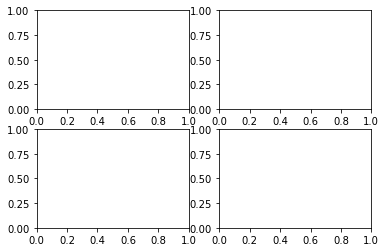

In [52]:
a = placeAxesOnGrid(grating)
fig,ax = plt.subplots(2,2)
fig.add_axes(a)

In [ ]:
fig